In [132]:
from pathlib import Path
import os
import re
import apsw
import pandas as pd
import time



In [133]:
cwd = Path.cwd().parent.parent
print(cwd)

/home/ricdeez/uni/projects/iotnetlearn


In [134]:
from sqlalchemy import create_engine
db_path = os.path.join(cwd, 'db', 'db02', 'NetCollector.sqlite')
engine = create_engine(f'sqlite:////{db_path}')

sql = """

    select d.srcPort as srcport,
           d.dstPort as dstport,
           sum(d.frameSize) as totalframesize,
           min(d.frameSize) as minframesize,
           max(d.frameSize) as maxframesize,
           avg(d.frameTTL) as framettl,
           d.country_name,
           d.manufacturer,
           d.device_type
    from deviceLog d
    where d.device_type is not null and d.country_name is not null
    group by d.srcAddr, d.dstAddr, d.srcPort, d.dstPort

"""

df = pd.read_sql_query(sql, engine)



In [136]:
import numpy as np
df['country_name'] = np.where(df['country_name'] == '-', 'Unspecified', df['country_name']) 

In [86]:
df['device_type'].unique()

array(['Samsung Phone', 'Other', 'Ring Doorbell', 'Amplifi mesh',
       'Sonos Speaker', 'Sonos Amp', 'Yamaha Amp', 'Xbox', 'HP MFP',
       'Apple TV', 'iZone Controller'], dtype=object)

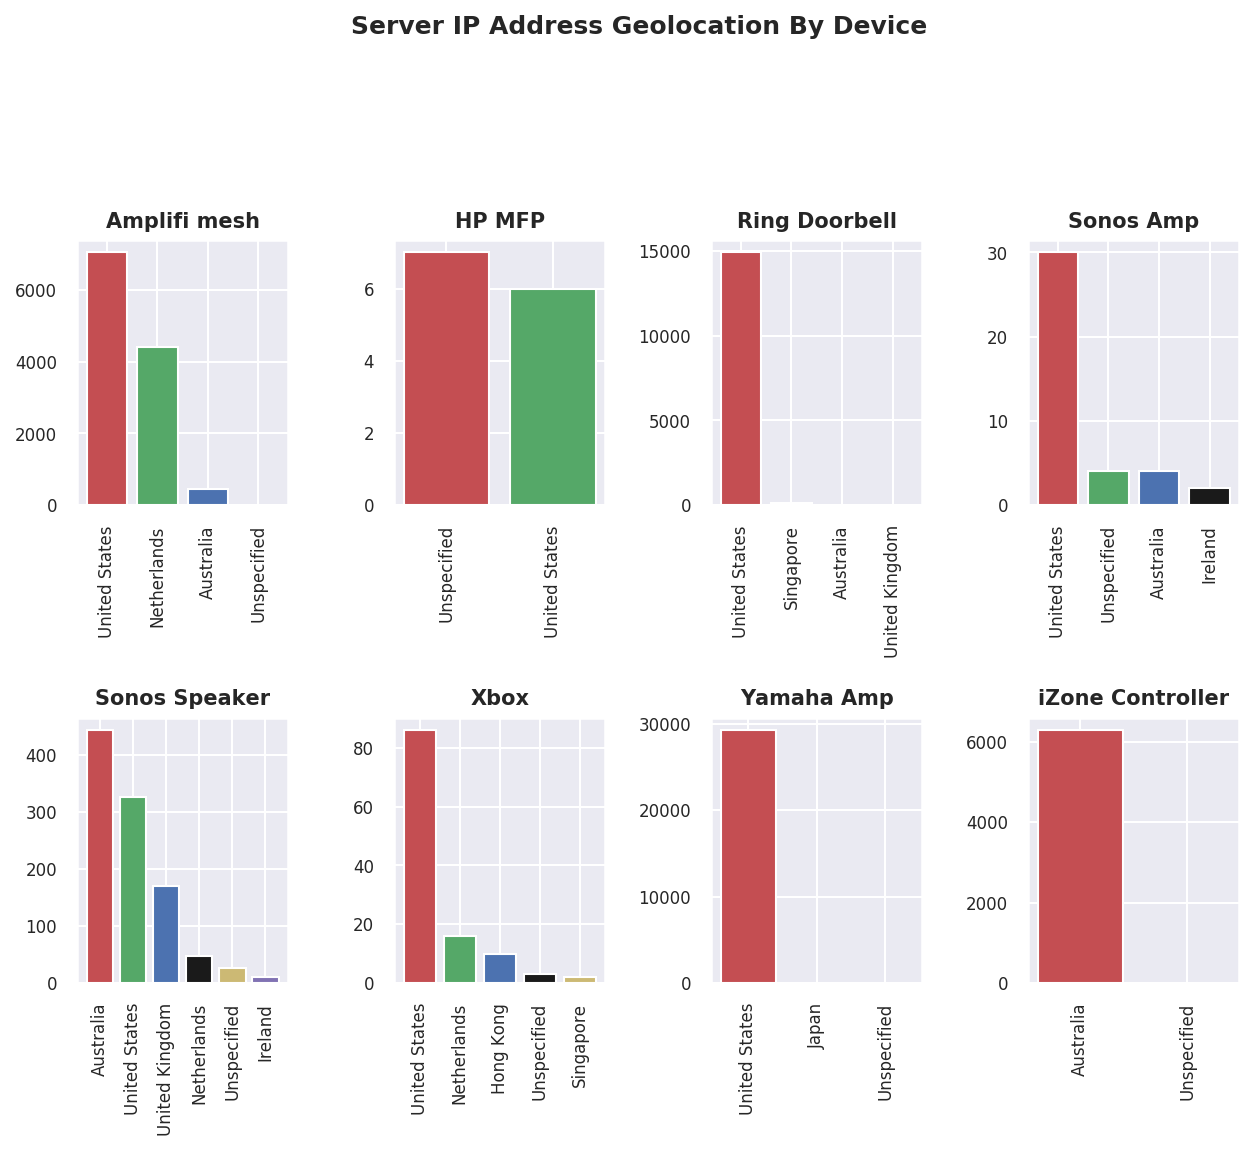

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
exclude_list = ['Other', 'Samsung Phone', 'Apple TV']
devices = [x for x in sorted(df['device_type'].unique()) if x not in exclude_list]
my_colors = 'rgbkymc'

for idx, item in enumerate(devices, 1):
    arr = []
    for k, v in df[df['device_type']==item].groupby('country_name').count()['device_type'].iteritems():
        arr.append([k, v])
    arr = list(reversed(sorted(arr, key=lambda x: x[1])))
    x = [p[0] for p in arr]
    y = [p[1] for p in arr]
    plt.rcParams["figure.figsize"] = (10,15)
    plt.rcParams["figure.dpi"] = 150
    plt.suptitle('Server IP Address Geolocation By Device', fontsize=12, fontweight='bold')
    plt.subplot(4,4,idx)
    plt.subplots_adjust(wspace = 0.5, hspace = 0.8) 
    plt.bar(x, y, color=my_colors)
    plt.title(item, fontsize=10, fontweight='bold')
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
plt.show()